### Assignment 14 - Decision Trees

#### 1st Problem Statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

Dataset --> Company_Data.csv

In [1]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Company_Data.csv")
Dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#Checking For NA Values & Dtypes of Columns
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Inference: There are No NA Values Present in the Dataset, 

"Sales" is Our Y Variable as Per problem statement, Which is a Continuous variable, So Converting it by Creating a buckets of levels i.e.(Median of Sales)

There are 3 X Variable of object Dtypes so will use dummies to Convert them to numerical types

In [4]:
#Getting the Median of Sales to make Buckets of Data
print(Dataset['Sales'].median())

7.49


In [5]:
#Creating a new Column with two bucket of Data for Sales
Dataset["sales"]= "<=7.49"
#Setting Bucket Based on Median Value of Original Sales Variables 
Dataset.loc[Dataset["Sales"]>=7.49,"sales"]=">=7.49"
Dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


Inference: Now the New 'sales' column has Two Label/Bucket Assigned based on Median of Sales (Y) Variable, then will Drop the Original Sales Variable

In [6]:
#Dropping Sales column from the data 
Dataset.drop(["Sales"],axis=1,inplace = True)
Dataset.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


Inference: Original 'Sales' is Dropped.

Now Will Do Encoding for Y Variable Label Encoding, and For X Variable One Hot Encoding

In [7]:
#Applying lable encoder to sales column
label_encoder = preprocessing.LabelEncoder()
Dataset['sales'] = label_encoder.fit_transform(Dataset['sales']) 
Dataset.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


Inference: Label Encoding is Applied, Now will do One Hot Encoding For X Variable

In [8]:
#Get Dummies -- One Hot Encoding
Final_df = pd.get_dummies(Dataset)
Final_df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


Inference: After Apply Encoding the Dataset is Ready for Decision tree, Lets Separate X & Y Variable Now

In [9]:
# seprating x and y variables 
x= pd.concat([Final_df.iloc[:,0:7],Final_df.iloc[:,8:]],axis = 1)
y= Final_df.iloc[:,7]

In [10]:
# to check unique values in specified column
print(Final_df['sales'].unique())
# to count total values for distinct/unique value
print(Final_df.sales.value_counts())

[1 0]
1    201
0    199
Name: sales, dtype: int64


Inference: We Can Say This is almost a Balanced Dataset.

When the Observation/Values are Equally Distributed along the all the Classes then it called Balanced Dataset.when They are not Equally Distributed then it is Called Inbalance Dataset 

Note: 

Claas 1 Refers to Sales High 

Class 0 Refers To Sales Low

In [11]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=1)

Inference: Made a Train-Test Split of 70% - 30%

#### Building Decision Tree

In [12]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Inference: Model is Fitted, The Decision Tree is of C5.0 Technique, Pruning is Set using the Hyperparameter of max_depth = 5, while means only Five Split/Node will be there.

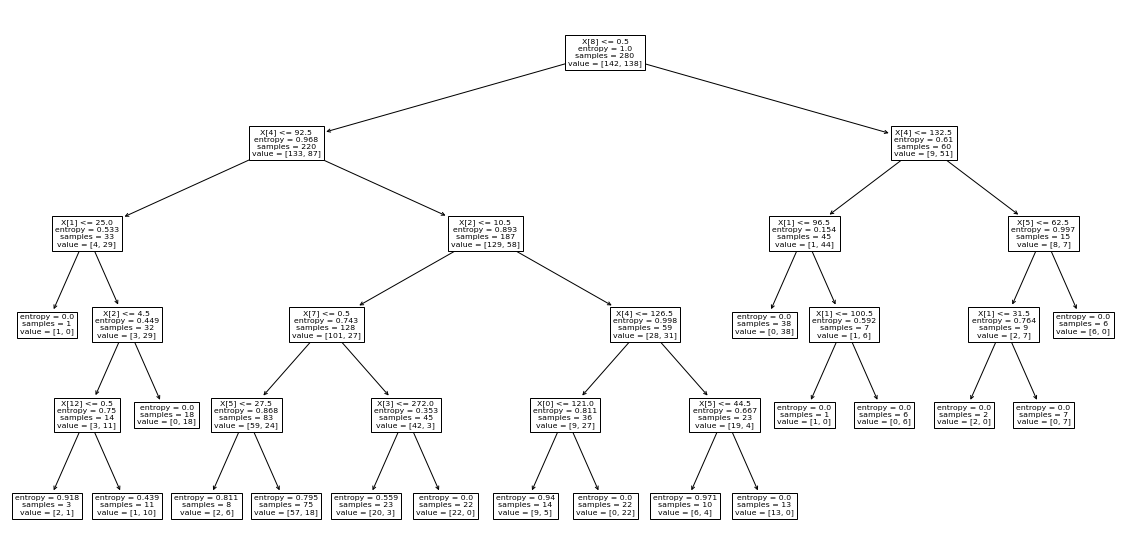

In [13]:
#PLot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model);

In [14]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    76
1    44
dtype: int64

In [15]:
#The preds value for each datapoint in the Test Dataset 
preds

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1])

Inference: Above Are the Predicted Value.

In [16]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(Y_test,preds)

col_0,0,1
sales,,
0,50,7
1,26,37


In [17]:
#Accuracy 
np.mean(preds==Y_test)*100

72.5

Inference: This is the Final Accuracy of the Decision Tree Model is 72.5%

#### 2nd Problem Statement
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good" 

Dataset --> Fraud_check.csv

In [18]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [19]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Fraud_check.csv")
Dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Inference: Columns/ Variable Names are not right so, Renaming them first

In [20]:
Dataset.rename(columns={"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income",
                        "City.Population":"City_Population","Work.Experience":"Work_Experience"},inplace=True)
Dataset.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Inference: Now Columns Same are Correct

In [21]:
#Checking For NA Value and Dtypes of Columns
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Inference: There are No NA Values Present in the Dataset, 

"Taxable_Income" is Our Y Variable as Per problem statement, Which is a Continuous variable, So Converting it by Creating a buckets of levels i.e. <= 30000 as "Risky" and others are "Good" 

There are 3 X Variable of object Dtypes so will use dummies to Convert them to numerical types

In [22]:
##Converting the Taxable income variable to bucketing. 

#Creating a new Column with two bucket of Data for Taxable_Income
Dataset["taxable_income"]="<=30000"

#Setting Bucket Based on Median Value of Original Sales Variables 
Dataset.loc[Dataset["Taxable_Income"]>=30000,"taxable_income"]="Good"
Dataset.loc[Dataset["Taxable_Income"]<=30000,"taxable_income"]="Risky"

##Droping the Taxable income variable
Dataset.drop(["Taxable_Income"],axis=1,inplace=True)

Dataset.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


Inference: Now Will Do Encoding for Y Variable Label Encoding, and For X Variable One Hot Encoding

In [23]:
#Applying lable encoder to sales column
label_encoder = preprocessing.LabelEncoder()
Dataset['taxable_income'] = label_encoder.fit_transform(Dataset['taxable_income']) 
Dataset.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_income
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0


Inference: Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”, Now Encoding For X Variable

In [24]:
#Get Dummies -- One Hot Encoding
Final_df = pd.get_dummies(Dataset)
Final_df.head()

,City_Population,Work_Experience,taxable_income,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,0,1,0,0,0,1,0,1
1,134075,18,0,0,1,1,0,0,0,1
2,160205,30,0,1,0,0,1,0,0,1
3,193264,15,0,0,1,0,0,1,0,1
4,27533,28,0,1,0,0,1,0,1,0


Inference: After Apply Encoding the Dataset is Ready for Decision tree, Lets Separate X & Y Variable Now

In [25]:
# seprating x and y variables 
x= pd.concat([Final_df.iloc[:,0:2],Final_df.iloc[:,3:]],axis = 1)
y= Final_df.iloc[:,2]

In [26]:
# to check unique values in specified column
print(Final_df['taxable_income'].unique())
# to count total values for distinct/unique value
print(Final_df.taxable_income.value_counts())

[0 1]
0    476
1    124
Name: taxable_income, dtype: int64


In [27]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=1)

Inference: Made a Train-Test Split of 70% - 30%

#### Building Decision Tree

In [28]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Inference: Model is Fitted, The Decision Tree is of C5.0 Technique, Pruning is Set using the Hyperparameter of max_depth = 5, while means only Five Split/Node will be there.

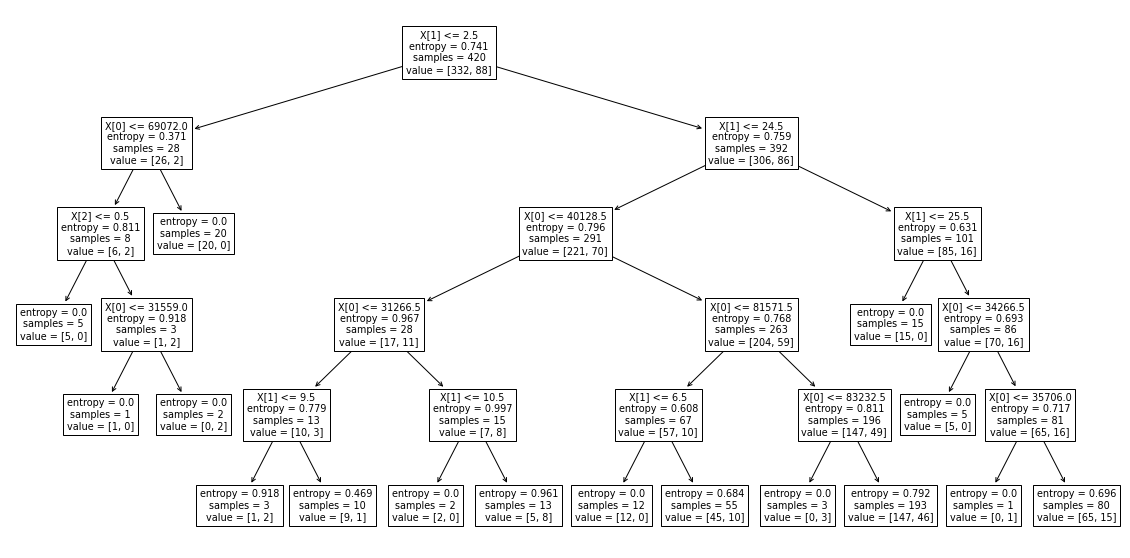

In [29]:
#PLot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model);

In [30]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

0    171
1      9
dtype: int64

In [31]:
#The preds value for each datapoint in the Test Dataset 
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

Inference: Above Are the Predicted Value.

In [32]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(Y_test,preds)

col_0,0,1
taxable_income,,
0,135,9
1,36,0


In [33]:
#Accuracy 
np.mean(preds==Y_test)*100

75.0

Inference: This is the Final Accuracy of the Decision Tree Model is 75.0%